## Activity 05
### Tyler Barna

In [12]:
## import modules (running on python 3.9.12)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pymc3 as pm
import random
import scipy as sp
import seaborn as sns


import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import lognorm

from sklearn.neighbors import KernelDensity as kd

## set seed for reproducibility
random.seed(5731) 

## import data 
df = pd.read_csv('planet_radii.csv')
df.head()

,Radius
0,1.37
1,2.19
2,1.24
3,2.08
4,1.40


Let's find some basic stats about the data

Number of planets in dataset:  1261
Smallest Radius:  0.27
Largest Radius:  16.1
Mean Radius:  2.2
Median Radius:  1.78


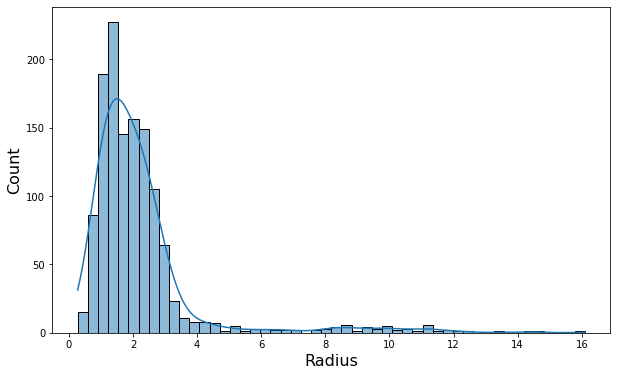

In [28]:
## find and print basic stats
print('Number of planets in dataset: ', len(df))
print('Smallest Radius: ', min(df['Radius']))
print('Largest Radius: ', max(df['Radius']))
print('Mean Radius: ', round(np.mean(df['Radius']),2))
print('Median Radius: ', np.median(df['Radius']))

## plot histogram
fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
sns.histplot(df['Radius'], kde=True, bins=50, ax=ax)
plt.xlabel('Radius', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();
